# Iris Dataset

# Problem Statement

Predict type of species for Iris flower.

In [30]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

# Data Gathering

In [18]:
iris = load_iris()

In [19]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [24]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [29]:
df['Target'] = iris.target
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


# EDA

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


# Feture Selection

In [32]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

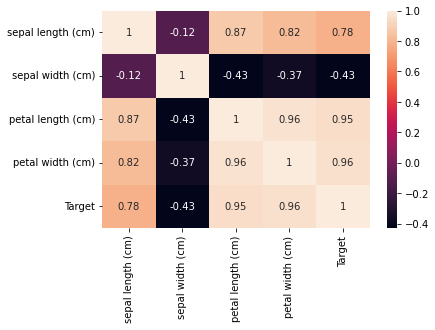

In [37]:
sns.heatmap(df.corr(), annot=True)

In [44]:
# plt.figure(figsize=(20,50))
# plt.boxplot(df['sepal width (cm)'])

# Model Training

In [46]:
from sklearn.linear_model import LinearRegression

In [72]:
LR = LinearRegression()

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [66]:
x= df.drop('Target',axis=1)
y= df['Target']

In [73]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size =0.25, random_state= 12)

In [74]:
LR.fit(x_train, y_train)

LinearRegression()

# Model Evaluate

## Linear Regression

Training Data

In [75]:
y_pred_train_Li = LR.predict(x_train)

In [79]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score

In [83]:
MSE = mse(y_train, y_pred_train_Li)
print('MSE: ', MSE)
print('**'*30)
RMSE = np.sqrt(MSE)
print('RMSE: ', RMSE)
print('**'*30)
MAE = mae(y_train, y_pred_train_Li)
print('MAE: ', MAE)
print('**'*30)
r2 = r2_score(y_train, y_pred_train_Li)
print('r2_score: ', r2.round(2))

MSE:  0.047596781936406436
************************************************************
RMSE:  0.21816686718291217
************************************************************
MAE:  0.16838651453169157
************************************************************
r2_score:  0.93


Testing 

In [86]:
y_pred_test_Li = LR.predict(x_test)

In [88]:
MSE = mse(y_test, y_pred_test_Li)
print('MSE: ', MSE)
print('**'*30)
RMSE = np.sqrt(MSE)
print('RMSE: ', RMSE)
print('**'*30)
MAE = mae(y_test, y_pred_test_Li)
print('MAE: ', MAE)
print('**'*30)
r2 = r2_score(y_test, y_pred_test_Li)
print('r2_score: ', r2.round(2))

MSE:  0.04329107978709588
************************************************************
RMSE:  0.20806508545908386
************************************************************
MAE:  0.15485752775905287
************************************************************
r2_score:  0.94


## Logsitic Regression

In [93]:
df['Target'].value_counts()

0    50
1    50
2    50
Name: Target, dtype: int64

In [111]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size =0.25, random_state= 12, stratify=y)

In [112]:
from sklearn.linear_model import LogisticRegression

In [117]:
Logis = LogisticRegression(multi_class='ovr')

In [119]:
Logis.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [120]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

Training Data

In [121]:
y_pred_train_Lo = Logis.predict(x_train)

In [124]:
cnf = confusion_matrix(y_train, y_pred_train_Lo)
print(cnf)
print('**'*20)

mul_cnf = multilabel_confusion_matrix(y_train, y_pred_train_Lo)
print(mul_cnf)
print('**'*20)

acc = accuracy_score(y_train, y_pred_train_Lo)
print(acc)
print('**'*20)

clf_rep = classification_report(y_train, y_pred_train_Lo)
print(clf_rep)

[[38  0  0]
 [ 0 36  1]
 [ 0  1 36]]
****************************************
[[[74  0]
  [ 0 38]]

 [[74  1]
  [ 1 36]]

 [[74  1]
  [ 1 36]]]
****************************************
0.9821428571428571
****************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      0.97      0.97        37
           2       0.97      0.97      0.97        37

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112



In [126]:
Logis.score(x_train,y_train)

0.9821428571428571

In [127]:
##Linear 0.93, Logsitic 0.98 >> Training

Testing

In [130]:
y_pred_test_Lo = Logis.predict(x_test)

cnf = confusion_matrix(y_test, y_pred_test_Lo)
print(cnf)
print('**'*20)

mul_cnf = multilabel_confusion_matrix(y_test, y_pred_test_Lo)
print(mul_cnf)
print('**'*20)

acc = accuracy_score(y_test, y_pred_test_Lo)
print(acc)
print('**'*20)

clf_rep = classification_report(y_test, y_pred_test_Lo)
print(clf_rep)

[[12  0  0]
 [ 0  9  4]
 [ 0  1 12]]
****************************************
[[[26  0]
  [ 0 12]]

 [[24  1]
  [ 4  9]]

 [[21  4]
  [ 1 12]]]
****************************************
0.868421052631579
****************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      0.69      0.78        13
           2       0.75      0.92      0.83        13

    accuracy                           0.87        38
   macro avg       0.88      0.87      0.87        38
weighted avg       0.88      0.87      0.87        38



In [131]:
Logis.score(x_test,y_test)

0.868421052631579

In [ ]:
#Linear 0.94, Logistic 0.86 >> Testing